# Machine Learning 1 - Nearest Neighbors and Decision Trees

## Lab objectives

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

In [1]:
from lab_tools import CIFAR10, get_hog_image

dataset = CIFAR10('../../extern_data/CIFAR10/')

Pre-loading training data
Pre-loading test data


# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset.

In [2]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(n_neighbors=1)

* What is the **descriptive performance** of this classifier ?
* Modify the code to estimate the **predictive performance**.
* Use cross-validation to find the best hyper-parameters for this method.

Best score =  0.7097333333333333
Best n =  5


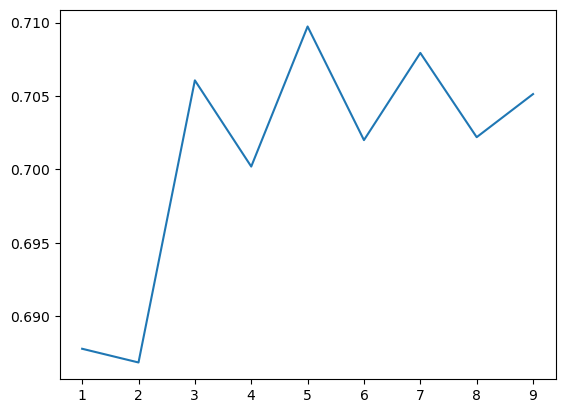

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
n_neighbors = np.arange(1, 10, 1)
scores = []
best_score = 0
best_n = 0
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    cross_val = cross_val_score(clf, dataset.train['hog'], dataset.train['labels']).mean()
    scores.append(cross_val)
    if cross_val > best_score:
        best_n = n
        best_score = cross_val

plt.plot(n_neighbors, scores)
print("Best score = ", best_score)
print("Best n = ", best_n)

## 2. Decision Trees

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the HoG training set.
* Use cross-validation to find the best hyper-paramters for this method.

In [ ]:
from sklearn import tree

hyper_parameters = np.arange(1, 10, 1)
scores = []
best_score = 0
best_hyper_parameter = 0
for hyper_parameter in hyper_parameters:
    clf = tree.DecisionTreeClassifier()
    cross_val = cross_val_score(clf, dataset.train['hog'], dataset.train['labels']).mean()
    scores.append(cross_val)
    if cross_val > best_score:
        best_hyper_parameter = hyper_parameter
        best_score = cross_val

plt.plot(hyper_parameters, scores)
print("Best score = ", best_score)
print("Best n = ", best_hyper_parameter)


## 3. Random Forests

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR data. 
* Use cross-validation to find the best hyper-paramters for this method.

In [ ]:
from sklearn import ensemble

# --- Your code here --- #
